In [2]:


from itertools import product
import time


charset = "abc123"        
target_password = "a2"    
max_len = 4              

def brute_force_find(target, charset, max_len, stop_on_find=True):
    attempts = 0
    start = time.perf_counter()
    for length in range(1, max_len + 1):
        for comb in product(charset, repeat=length):
            attempts += 1
            candidate = ''.join(comb)
            if candidate == target:
                elapsed = time.perf_counter() - start
                return True, candidate, attempts, elapsed
    elapsed = time.perf_counter() - start
    return False, None, attempts, elapsed

found, pw, attempts, elapsed = brute_force_find(target_password, charset, max_len)
print("Found:", found)
print("Password:", pw)
print("Attempts:", attempts)
print(f"Time elapsed: {elapsed:.6f} s")


Found: True
Password: a2
Attempts: 11
Time elapsed: 0.000013 s


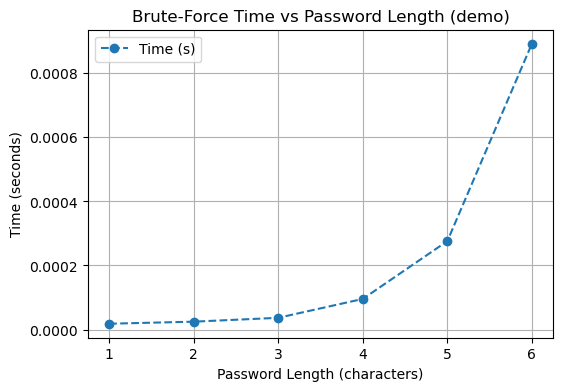

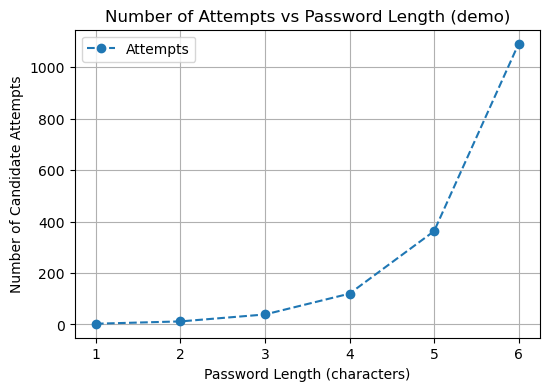

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt
import time
from itertools import product

charset = "abc"       
max_test_length = 6   
target_template = "a" * max_test_length  

lengths = list(range(1, max_test_length + 1))
times = []
attempts_list = []

for L in lengths:

    target = "z" * L  
    start = time.perf_counter()
    attempts = 0
    for length in range(1, L + 1):
        for comb in product(charset, repeat=length):
            attempts += 1
            candidate = ''.join(comb)
            if candidate == target:
                break
    elapsed = time.perf_counter() - start
    
    times.append(elapsed)
    attempts_list.append(attempts)


plt.figure(figsize=(6,4))
plt.plot(lengths, times, marker='o', linestyle='--', label='Time (s)')
plt.title("Brute-Force Time vs Password Length (demo)")
plt.xlabel("Password Length (characters)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(lengths, attempts_list, marker='o', linestyle='--', label='Attempts')
plt.title("Number of Attempts vs Password Length (demo)")
plt.xlabel("Password Length (characters)")
plt.ylabel("Number of Candidate Attempts")
plt.grid(True)
plt.legend()
plt.show()


In [5]:
def search_space_size(charset_len, length):
    return charset_len ** length

for L in range(1, 7):
    print(f"Length {L}: search space = {search_space_size(len(charset), L)} candidates")


Length 1: search space = 3 candidates
Length 2: search space = 9 candidates
Length 3: search space = 27 candidates
Length 4: search space = 81 candidates
Length 5: search space = 243 candidates
Length 6: search space = 729 candidates
